<a href="https://colab.research.google.com/github/efrenk/ExData_Plotting1/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

%matplotlib inline
torch.manual_seed(0)

cuda:0


In [0]:
N = 100
x = torch.rand(N,1)*5
m = 5.1
b = 2.3
y = m*x + b
# Get some noisy observations
std = 2
y_obs = y + std*torch.randn(N,1)

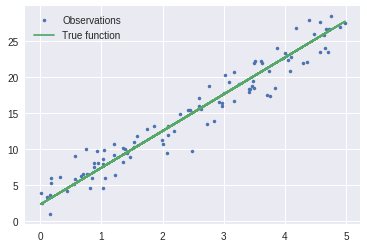

In [0]:
plt.plot(x.numpy(), y_obs.numpy(), '.', label='Observations')
plt.plot(x.numpy(), y.numpy(), label='True function')
plt.legend()
plt.show()

In [0]:
w_est = torch.randn(1, requires_grad=True)
b_est = torch.randn(1, requires_grad=True)

We require a loss function to calculate how good our estimates are. The smaller the loss, the better the estimate. In this case we choose the Mean Squared Error (MSE).
\begin{align}
\mathcal{L} = \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - y_i^{obs})^2
\end{align}
where,  $\hat{y}_i = w_{est} x_i + b_{est}$ is the estimated output. and $y_i^{obs}$ are the observed outputs.

In [0]:
y_pred = w_est * x + b_est
L = torch.mean((y_pred-y_obs)**2)

In [0]:
L

tensor(240.8829, grad_fn=<MeanBackward1>)

We can use gradient information to 'guide' us in the direction of minimising the loss. The `.backward()` function will calculate the gradient on any scalar value that was calculated using variables that had `requires_grad=True`. i.e. in our case we will get $\frac{\partial \mathcal{L}}{\partial w}$ and $\frac{\partial \mathcal{L}}{\partial b}$.

In [0]:
print((w_est.grad, b_est.grad))
L.backward()
print((w_est.grad, b_est.grad))

(None, None)
(tensor([-87.2228]), tensor([-28.1087]))


If you wish to check the above gradients, say for w:
\begin{align}
\frac{\partial \mathcal{L}}{\partial w} &= \frac{2}{N}\sum_{i=1}^N (\hat{y}_i - y_i^{obs}) \frac{\partial y_i}{\partial w} \\
&= \frac{2}{N}\sum_{i=1}^N \xi_i x_i
\end{align}
where $\xi_i = \hat{y}_i - y_i^{obs}$ is the error. Plugging the values into this we can see below that the gradients are correct.

In [0]:
e = y_pred - y_obs
(e * x).mean() * 2

tensor(-87.2228, grad_fn=<MulBackward0>)

Now we can use gradient descent to update our estimates iteratively until we get the optimal values.
\begin{align}
w_{new} = w_{old} - \gamma \frac{\partial \mathcal{L}}{\partial w_{old}}
\end{align}
where $\gamma$ is the learning rate. It's typically set to small values. We will use $\gamma=0.1$.

Keep in mind that the true values of w and b are 5.1 and 2.3 respectively.

In [0]:
gamma = 0.1

# new starting point
w_est = torch.randn(1, requires_grad=True)
b_est = torch.randn(1, requires_grad=True)

losses = []
ws = [w_est]
bs = [b_est]
w_grad = []

for i in range(200):
  # calculate new loss function
  y_pred = w_est * x + b_est
  L = torch.mean((y_pred-y_obs)**2)
  
  # calculate new gradients
  L.backward()
  
  w_grad.append(w_est.grad)
  with torch.no_grad():
#     import pdb; pdb.set_trace()
    # update parameters
    w_est = w_est - gamma * w_est.grad
    b_est = b_est - gamma * b_est.grad
  
  # zero the gradients
  w_est.requires_grad_(True)
  b_est.requires_grad_(True)
  
  # save data
  ws.append(w_est)
  bs.append(b_est)
  losses.append(L)
  
  
  

> <ipython-input-29-09c6479449a4>(24)<module>()
-> w_est = w_est - gamma * w_est.grad
(Pdb) exit


BdbQuit: ignored

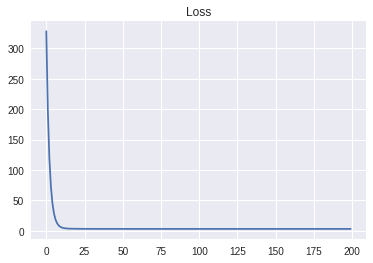

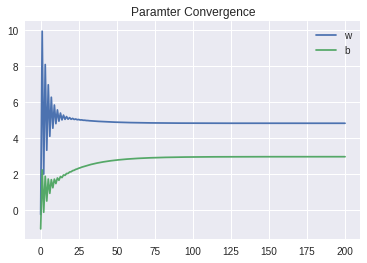

In [0]:
plt.plot(np.array(torch.tensor(losses)))
plt.title('Loss')
plt.show()
plt.plot(np.array(torch.tensor(ws)), label='w')
plt.plot(np.array(torch.tensor(bs)), label='b')
plt.legend()
plt.title('Paramter Convergence')
plt.show()

In [0]:
ws[-5:]

[tensor([4.8257], requires_grad=True),
 tensor([4.8257], requires_grad=True),
 tensor([4.8257], requires_grad=True),
 tensor([4.8257], requires_grad=True),
 tensor([4.8257], requires_grad=True)]

In [0]:
bs[-5:]

[tensor([2.9642], requires_grad=True),
 tensor([2.9642], requires_grad=True),
 tensor([2.9643], requires_grad=True),
 tensor([2.9643], requires_grad=True),
 tensor([2.9643], requires_grad=True)]